# WEAPONS DETECTION PROJECT 
### Using Keras, Tensorflow, OpenCV and Python
###### Guns and Knives Image Detection : 2Weapons Dataset Folder
CONSIDERING WHOLE DATA OF GUNS AND KNIVES

Aim : To detect the two different weapons - Guns and Knives, build and evaluate the model using deep learning, tensorflow and python.

DATASETS :
    1. https://www.dasci.ess/transfercia/open-data/24705/
    2. https://www.sci2s.ugr.es/weapons-detection#SW

###### SOURCING DATA FOLDERS

In [1]:
#import libraries

#warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pickle

#building model libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD, Adamax, Nadam
import keras

Using TensorFlow backend.


In [2]:
#weapon image directory
DATA_DIR = r".\2Weapons"

#category list
CATEGORIES = ["Guns", "Knife"]

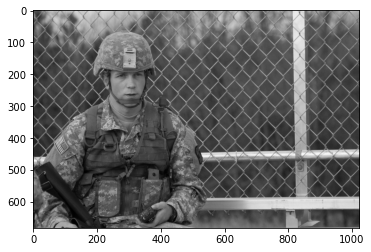

In [3]:
#read images from Train dataset
for cate in CATEGORIES:
    #path to each category
    path = os.path.join(DATA_DIR, cate)
    for img in os.listdir(path):
        #read train images from all categories
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr, cmap='gray')
        plt.show()
        break
    break

In [4]:
print(img_arr)

[[139 133 123 ... 162 160 159]
 [133 127 116 ... 165 162 161]
 [126 119 108 ... 167 164 162]
 ...
 [ 71  83  79 ... 109 108 109]
 [ 77  91  88 ... 128 128 129]
 [ 82  97  96 ... 165 165 166]]


In [5]:
print(img_arr.shape)
#print(test_img_arr.shape)

(683, 1024)


###### PRE-PROCESSING STEP

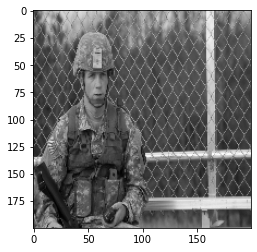

In [6]:
#working on normalisation at Training data
IMG_SIZE = 200 #optimal image size number

new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_arr, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_train_data():
    #read images from Train dataset
    for cate in CATEGORIES:
        #path to each category
        path = os.path.join(DATA_DIR, cate)
        class_num = CATEGORIES.index(cate)
        for img in os.listdir(path):
            try:
                #read train images from all categories
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_arr, class_num])
            except Exception as e :
                pass
            
create_train_data()

In [8]:
print(len(training_data))

1664


In [9]:
#shuffle the training data
import random
random.shuffle(training_data)

In [10]:
#sample checking
for ex in training_data[:10]:
    print(ex[1])

0
1
0
0
0
1
0
0
0
0


###### TRAIN-TEST SPLIT PROCESSING

In [11]:
X = [] #feature set
y = [] #label list

In [12]:
#STORE features and labels
for features, labels in training_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #1=GRAYSCALE, IMG_SIZE=55

In [13]:
#saving the data
#for X
pkl_out = open("X.pickle", "wb")
pickle.dump(X, pkl_out)
pkl_out.close()

#for y
pkl_out = open("y.pickle", "wb")
pickle.dump(y, pkl_out)
pkl_out.close()

In [14]:
#read pickle file for X
X_pkl_in = open("X.pickle", "rb")
X = pickle.load(X_pkl_in)

In [15]:
#checking X
X[1]

array([[[ 88],
        [ 95],
        [ 95],
        ...,
        [121],
        [120],
        [119]],

       [[ 90],
        [ 95],
        [ 97],
        ...,
        [123],
        [122],
        [121]],

       [[ 91],
        [ 96],
        [ 98],
        ...,
        [124],
        [123],
        [122]],

       ...,

       [[127],
        [119],
        [118],
        ...,
        [150],
        [148],
        [147]],

       [[111],
        [110],
        [111],
        ...,
        [149],
        [148],
        [147]],

       [[110],
        [111],
        [110],
        ...,
        [149],
        [147],
        [147]]], dtype=uint8)

In [16]:
#read pickle file for X
y_pkl_in = open("y.pickle", "rb")
y = pickle.load(y_pkl_in)

In [17]:
y[1]

1

In [18]:
X.shape

(1664, 200, 200, 1)

In [19]:
#read pickle file for X and y
X = pk.load(open("X.pickle","rb"))
y = pk.load(open("y.pickle","rb"))

#normalization
X = X/255.0
y = np.array(y)

In [20]:
print(X.shape)
print(y.shape)

(1664, 200, 200, 1)
(1664,)


In [21]:
#train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)

In [22]:
X_train

array([[[[0.1372549 ],
         [0.14117647],
         [0.13333333],
         ...,
         [0.22745098],
         [0.21176471],
         [0.3372549 ]],

        [[0.14509804],
         [0.1372549 ],
         [0.13333333],
         ...,
         [0.23137255],
         [0.21568627],
         [0.22745098]],

        [[0.1372549 ],
         [0.14117647],
         [0.12941176],
         ...,
         [0.24313725],
         [0.22352941],
         [0.01960784]],

        ...,

        [[0.67058824],
         [0.70196078],
         [0.65098039],
         ...,
         [0.45490196],
         [0.57647059],
         [0.50588235]],

        [[0.68235294],
         [0.64705882],
         [0.65490196],
         ...,
         [0.38039216],
         [0.3254902 ],
         [0.41568627]],

        [[0.68627451],
         [0.58431373],
         [0.65490196],
         ...,
         [0.43921569],
         [0.37647059],
         [0.25490196]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [23]:
X_test

array([[[[0.16470588],
         [0.15294118],
         [0.16078431],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[0.17254902],
         [0.16470588],
         [0.16470588],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[0.17647059],
         [0.16078431],
         [0.17254902],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        ...,

        [[0.49803922],
         [0.49019608],
         [0.47843137],
         ...,
         [0.74509804],
         [0.73333333],
         [0.72941176]],

        [[0.51764706],
         [0.50588235],
         [0.47058824],
         ...,
         [0.70980392],
         [0.71372549],
         [0.69019608]],

        [[0.51764706],
         [0.49411765],
         [0.45882353],
         ...,
         [0.7372549 ],
         [0.71764706],
         [0.6627451 ]]],


       [[[0.97254902],
         [0.94901961],
         [0.95

In [24]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
y_test

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [26]:
#shape of Xs
print(X_train.shape)
print(X_test.shape)

(1497, 200, 200, 1)
(167, 200, 200, 1)


In [27]:
#shape of Ys
print(y_train.shape)
print(y_test.shape)

(1497,)
(167,)


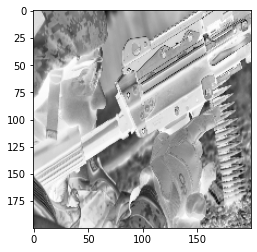

In [28]:
# sample image check
plt.imshow(X_train[0][:,:,0], cmap = plt.cm.binary) # cmap is used to bring the image in the grayscale/BnW format
plt.show()

In [29]:
print(X_train[0][:,:,0])

[[0.1372549  0.14117647 0.13333333 ... 0.22745098 0.21176471 0.3372549 ]
 [0.14509804 0.1372549  0.13333333 ... 0.23137255 0.21568627 0.22745098]
 [0.1372549  0.14117647 0.12941176 ... 0.24313725 0.22352941 0.01960784]
 ...
 [0.67058824 0.70196078 0.65098039 ... 0.45490196 0.57647059 0.50588235]
 [0.68235294 0.64705882 0.65490196 ... 0.38039216 0.3254902  0.41568627]
 [0.68627451 0.58431373 0.65490196 ... 0.43921569 0.37647059 0.25490196]]


In [30]:
# using keras under tensorflow to represent the X data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [31]:
print(X_train[0][:,:,0])

[[0.02312285 0.02409343 0.02269801 ... 0.03469419 0.03137129 0.04838555]
 [0.02444415 0.02342417 0.02269801 ... 0.03529237 0.03195224 0.03263211]
 [0.02312285 0.02409343 0.02203042 ... 0.03708689 0.03311414 0.00281311]
 ...
 [0.11297162 0.11979791 0.1108197  ... 0.06938838 0.08539963 0.07257832]
 [0.11495358 0.11042824 0.11148729 ... 0.05802304 0.04821884 0.059638  ]
 [0.11561423 0.09972004 0.11148729 ... 0.06699568 0.05577119 0.03657047]]


###### BUILDING MODEL

In [32]:
#batch size
BATCH_SIZE = 35

#learning rate
LR = 0.01

#decay rate
DEC = 0.01

#epochs number
NUM_EPOCHS = 10

In [33]:
#name format
NAME = "Guns-vs-Knives-64x2-CNN"

In [34]:
#Sequential Model building
model = Sequential()

In [35]:
#LAYERS OF MODEL

model.add(Conv2D(32, (3,3), padding='same', input_shape = X.shape[1:], activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.75))

model.add(Conv2D(64, (3,3), padding='same', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.75))

model.add(Conv2D(128, (3,3), padding='same', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.75))

model.add(Conv2D(128, (3,3), padding='same', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.75))

model.add(Dense(1, activation = "sigmoid"))

In [36]:
#callback
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

#checking one by one optimizers and analysing the model
opt = Adam(lr=LR, decay=DEC)

#compile
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

#summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        3

In [37]:
#fitting the model
model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs= NUM_EPOCHS, callbacks=[tensorboard]) 

Epoch 1/10
60/60 [==============================] - 158s 2s/step - loss: 32.6681 - accuracy: 0.5400
Epoch 2/10
60/60 [==============================] - 122s 2s/step - loss: 16.2744 - accuracy: 0.5989
Epoch 3/10
60/60 [==============================] - 123s 2s/step - loss: 5.5833 - accuracy: 0.5731
Epoch 4/10
60/60 [==============================] - 123s 2s/step - loss: 3.4931 - accuracy: 0.5894
Epoch 5/10
60/60 [==============================] - 122s 2s/step - loss: 1.7364 - accuracy: 0.6037
Epoch 6/10
60/60 [==============================] - 125s 2s/step - loss: 1.0495 - accuracy: 0.6135
Epoch 7/10
60/60 [==============================] - 124s 2s/step - loss: 0.8683 - accuracy: 0.6188
Epoch 8/10
60/60 [==============================] - 123s 2s/step - loss: 0.7096 - accuracy: 0.6376
Epoch 9/10
60/60 [==============================] - 122s 2s/step - loss: 0.6348 - accuracy: 0.6712
Epoch 10/10
60/60 [==============================] - 124s 2s/step - loss: 0.6387 - accuracy: 0.6535


###### PREDICTION

In [38]:
# evaluate the validation data
val_loss, val_acc = model.evaluate(X_test, y_test)

6/6 [==============================] - 7s 410ms/step - loss: 0.6010 - accuracy: 0.7126


In [44]:
# printing validation loss
#print(val_loss)

# printing validation accuracy
#print(val_acc)

In [41]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1)

In [43]:
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test, axis = 1)
# checking sample y true value for the predicted value
#print(Y_true)